# Assignment - Performance Metrics
# 1st Part

In this assignment, you are going to use your model to predict survival of the Titanic disaster. For this assignment, send a link to a Jupyter notebook containing solutions to the following tasks.

- Download Titanic data from Kaggle. The data in the train.csv file meets your need.
- Split your data into training and test sets.
- Predict the survival based on the test data you split by creating your model.
- Is your model's performance satisfactory? Explain.
- Try to improve your model's performance by adding or subtracting some variables. 
- Explore the advantages and disadvantages of Logistic Regression and discuss with your mentor.

In [1]:
import pandas as pd
import numpy as np
train_data = pd.read_csv('titanic_train.csv')
test_data = pd.read_csv('titanic_test.csv')

In [2]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
for data in (train_data, test_data):
    is_male = pd.get_dummies(data['Sex'],drop_first = True)
    data.insert(loc=4, column='is_male', value=is_male)
    data.drop(labels='Sex', axis=1, inplace=True)    
del data

In [7]:
for data in (train_data, test_data):
    print(pd.unique(data[['Embarked']].values.ravel('K')))
    #print(pd.unique(data[['Cabin']].values.ravel('K')))

['S' 'C' 'Q' nan]
['Q' 'S' 'C']


In [8]:
# C = Cherbourg
# S = Southampton
# Q = Queenstown
for data in (train_data, test_data):
    data.Embarked = data.Embarked.replace('C', 1)
    data.Embarked = data.Embarked.replace('Q', 2)
    data.Embarked = data.Embarked.replace('S', 3)
    data.Embarked = data.Embarked.replace(np.nan, 0)
del data

In [9]:
for data in (train_data, test_data):
    data.dropna(subset=['Age'], how='all', inplace=True)
del data

In [10]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   is_male      714 non-null    uint8  
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     714 non-null    float64
dtypes: float64(3), int64(5), object(3), uint8(1)
memory usage: 67.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 415
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  332 non-null    int64  
 1 

In [11]:
print(train_data.columns, "\n", test_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'is_male', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object') 
 Index(['PassengerId', 'Pclass', 'Name', 'is_male', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [12]:
X = train_data[['Pclass','is_male','Age','SibSp','Parch','Fare','Embarked']]
y = train_data['Survived']

In [13]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

## PS. Before, I have seen the queiston which says "The data in the train.csv file meets your need. Split your data into training and test sets.", I was going to use both train and test datasets on the Kaggle. I decided to keep EDA part on the test data and here is the train data allocation by using train_test_split

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111)

In [15]:
log_reg.fit(X_train, y_train)

LogisticRegression()

# Model Performance Measurement
We can use .score () function to measure the performance of our model. This function returns the ratio of correct predictions. Let's check this for both training and test data.

In [16]:
train_accuracy = log_reg.score(X_train, y_train)
test_accuracy = log_reg.score(X_test, y_test)

print('One-vs.-Rest', '-'*30, 
      'Accuracy on Train Data : {:.2f}'.format(train_accuracy), 
      'Accuracy on Test Data  : {:.2f}'.format(test_accuracy), sep='\n')

One-vs.-Rest
------------------------------
Accuracy on Train Data : 0.80
Accuracy on Test Data  : 0.79


In [17]:
log_reg_mnm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg_mnm.fit(X_train, y_train)

train_accuracy = log_reg_mnm.score(X_train, y_train)
test_accuracy = log_reg_mnm.score(X_test, y_test)

print('Multinomial (Softmax)', '-'*20, 
      'Accuracy on Train Data : {:.2f}'.format(train_accuracy), 
      'Accuracy on Test Data  : {:.2f}'.format(test_accuracy), sep='\n')

Multinomial (Softmax)
--------------------
Accuracy on Train Data : 0.79
Accuracy on Test Data  : 0.79


* When we check the results, we have 80% and 79% accuracy on train data. With test data, we have 79% and 79% accuracy. Both methods return approximately similar results.

In [18]:
import warnings; warnings.filterwarnings("ignore")

In [19]:
C_values = [0.001,0.01, 0.1,1,10,100, 1000]

accuracy_values = pd.DataFrame(columns=['C_values', 'Train Accuracy', 'Test Accuracy'])

for c in C_values:
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0, solver='lbfgs', multi_class='multinomial')
    lr.fit(X_train, y_train)
    accuracy_values = accuracy_values.append({'C_values': c,
                                              'Train Accuracy': lr.score(X_train, y_train),
                                              'Test Accuracy': lr.score(X_test, y_test)
                                             }, ignore_index=True)
display(accuracy_values)    

,C_values,Train Accuracy,Test Accuracy
0,0.001,0.688266,0.692308
1,0.010,0.775832,0.748252
2,0.100,0.800350,0.790210
3,1.000,0.789842,0.790210
4,10.000,0.791594,0.790210
5,100.000,0.791594,0.790210
6,1000.000,0.791594,0.790210


- C value for 0.100 gives the best accuracy values!

# Second Model Performance Measurement

These two variables has been deleted.
- sibsp	# of siblings / spouses aboard the Titanic
- parch	# of parents / children aboard the Titanic

In [20]:
X2 = train_data[['Pclass','is_male','Age','Fare','Embarked']]
y2 = train_data['Survived']

In [21]:
X2_train, X2_test, y2_train, y2_test =  train_test_split(X2, y2, test_size=0.20, random_state=111)

In [22]:
log_reg.fit(X2_train, y2_train)

LogisticRegression()

In [23]:
train_accuracy2 = log_reg.score(X2_train, y2_train)
test_accuracy2 = log_reg.score(X2_test, y2_test)

print('One-vs.-Rest', '-'*30, 
      'Accuracy on Train Data : {:.2f}'.format(train_accuracy2), 
      'Accuracy on Test Data  : {:.2f}'.format(test_accuracy2), sep='\n')

One-vs.-Rest
------------------------------
Accuracy on Train Data : 0.80
Accuracy on Test Data  : 0.79


In [24]:
log_reg_mnm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg_mnm.fit(X2_train, y_train)

train_accuracy2 = log_reg_mnm.score(X2_train, y_train)
test_accuracy2 = log_reg_mnm.score(X2_test, y_test)

print('Multinomial (Softmax)', '-'*20, 
      'Accuracy on Train Data : {:.2f}'.format(train_accuracy2), 
      'Accuracy on Test Data  : {:.2f}'.format(test_accuracy2), sep='\n')

Multinomial (Softmax)
--------------------
Accuracy on Train Data : 0.80
Accuracy on Test Data  : 0.79


* When we check the results, we have 80% and 80% accuracy on train data. With test data, we have 79% and 79% accuracy. Both methods return approximately similar results.

In [25]:
C_values = [0.001,0.01, 0.1,1,10,100, 1000]

accuracy_values2 = pd.DataFrame(columns=['C_values', 'Train Accuracy', 'Test Accuracy'])

for c in C_values:
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0, solver='lbfgs', multi_class='multinomial')
    lr.fit(X2_train, y2_train)
    accuracy_values2 = accuracy_values2.append({'C_values': c,
                                              'Train Accuracy': lr.score(X2_train, y2_train),
                                              'Test Accuracy': lr.score(X2_test, y2_test)
                                             }, ignore_index=True)
display(accuracy_values2)    

,C_values,Train Accuracy,Test Accuracy
0,0.001,0.674256,0.671329
1,0.010,0.760070,0.727273
2,0.100,0.800350,0.811189
3,1.000,0.795096,0.790210
4,10.000,0.793345,0.783217
5,100.000,0.793345,0.783217
6,1000.000,0.793345,0.783217


- C value for 0.100 gives the best accuracy values!

# Second model gives the best results.
The EDA part on the first part has increased the performance of the modal.
I believe without the EDA part all results will be lower than now.
- Sex column is changed to is_male.
- Embarked is changed to integer.
- Rows whose Age variable is nan are dropped.

# 2nd Part Performance Metrics

In this assignment, you will measure the performance of the model you created with the Titanic data in the previous lesson. To complete this assignment, send a link to a Jupyter notebook containing solutions to the following tasks.

- Evaluate the performance of your model with the metrics you have learned in this course.
- Plot the ROC and the precision / recall curves for different "c" values.

# 1. Confusion Matrix (Hata Matrisi)

In [26]:
print(train_data['Survived'].value_counts())
print(np.bincount(train_data['Survived']))

0    424
1    290
Name: Survived, dtype: int64
[424 290]


In [27]:
X3 = train_data[['Pclass','is_male','Age','Fare','Embarked']]
y3 = train_data['Survived']

In [28]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3,test_size=0.20, random_state=111)
survived_prediction_model = LogisticRegression()
survived_prediction_model.fit(X3_train, y3_train)

train_prediction = survived_prediction_model.predict(X3_train)
test_prediction = survived_prediction_model.predict(X3_test)

test_prediction_probability = survived_prediction_model.predict_proba(X3_test)[:,1]

In [29]:
from sklearn.metrics import confusion_matrix

confusion_matrix_train = confusion_matrix(y3_train, train_prediction)
confusion_matrix_test = confusion_matrix(y3_test, test_prediction)

In [30]:
print("Confusion Matrix (Train Data)", "-"*30, confusion_matrix_train, sep="\n")
print("\n\nConfusion Matrix (Test Data)", "-"*30, confusion_matrix_test, sep="\n")

Confusion Matrix (Train Data)
------------------------------
[[285  51]
 [ 66 169]]


Confusion Matrix (Test Data)
------------------------------
[[71 17]
 [13 42]]


In [ ]:
Train vs test comparation: 

In [31]:
TN = confusion_matrix_test[0][0]
TP = confusion_matrix_test[1][1]
FN = confusion_matrix_test[1][0]
FP = confusion_matrix_test[0][1]

print("True negative amount  :", TN)
print("True positive amount  :", TP)
print("False positive amount :", FP)
print("False negative amount :", FN)

True negative amount  : 71
True positive amount  : 42
False positive amount : 17
False negative amount : 13


## 1.1. Accuracy (Doğruluk)

In [32]:
from sklearn.metrics import accuracy_score

print("Accuracy value by the model   : ",  survived_prediction_model.score(X3_test, y3_test))
print("Calculated accuracy value     : ",  (TN + TP)/(FN + FP + TN + TP))
print("accuracy_score() value        : ",  accuracy_score(y3_test, test_prediction))

Accuracy value by the model   :  0.7902097902097902
Calculated accuracy value     :  0.7902097902097902
accuracy_score() value        :  0.7902097902097902


**Doğru olarak sınıflandırılanların toplam sayıya oranına doğruluk(Accuracy) denir : 0.79**

## 1.2. Error Rate (Misclassification Rate) (Hata Oranı)

In [36]:
error_rate = 1 - accuracy_score(y3_test, test_prediction)
error_rate

0.2097902097902098

**Yanlış sayısının toplam sayıya oranıdır : 0.21**

## 1.3. Precision (Hassasiyet )

In [38]:
from sklearn.metrics import precision_score

print("Calculated precision value   : ",  (TP)/(FP + TP))
print("precision_score() value      : ",  precision_score(y3_test, test_prediction))

Calculated precision value   :  0.711864406779661
precision_score() value      :  0.711864406779661


**Hassasiyet pozitif olarak tahmin edilenlerin ne kadarının gerçekten pozitif olduğunu gösterir. Örneğimiz için kurtulmuş olarak tahmin ettiklerimizin ne kadarının gerçekten kurtulduğunun değeridir.**

## 1.4. Recall / Sensitivity (Duyarlılık)

In [39]:
from sklearn.metrics import recall_score

print("Calculated recall value   : ",  (TP)/(TP + FN))
print("recall_score() value      : ",  recall_score(y3_test, test_prediction))

Calculated recall value   :  0.7636363636363637
recall_score() value      :  0.7636363636363637


**Gerçekten pozitif olanların ne kadar başarılı tahmin edildiğidir. Örneğimiz için bakarsak kurtulanların ne kadarının kurtulduğunu tahmin edebildiğimizi gösterir.**

## 1.5. Specificity (Özgünlük)

In [40]:
print("Calculated specificity value   : ",  (TN)/(TN + FP))

Calculated specificity value   :  0.8068181818181818


**Negatif olanların gerçekte ne kadarını negatif olarak tahmin ettik : 0,86**

## 1.6. F1 Score

In [41]:
from sklearn.metrics import f1_score

precision = precision_score(y3_test, test_prediction)
recall = recall_score(y3_test, test_prediction)


print("Calculated F1 score  : ",  2*((recall*precision)/(recall + precision)))
print("f1_score() value     : ",  f1_score(y3_test, test_prediction))

Calculated F1 score  :  0.736842105263158
f1_score() value     :  0.736842105263158


In [43]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

print(classification_report(y3_test, test_prediction))

print("f1_score() value        : {:.2f}".format(f1_score(y3_test, test_prediction)))
print("recall_score() value    : {:.2f}".format(recall_score(y3_test, test_prediction)))
print("precision_score() value : {:.2f}".format(precision_score(y3_test, test_prediction)))
print('\n')

metrics = precision_recall_fscore_support(y3_test, test_prediction)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        88
           1       0.71      0.76      0.74        55

    accuracy                           0.79       143
   macro avg       0.78      0.79      0.78       143
weighted avg       0.79      0.79      0.79       143

f1_score() value        : 0.74
recall_score() value    : 0.76
precision_score() value : 0.71


Precision  : [0.8452381  0.71186441]
Recall     : [0.80681818 0.76363636]
F1 Score   : [0.8255814  0.73684211]


**Data is balanced because there is no big difference between precision recall and f1 values. Test data has 88 rows of not-survived and 55 rows of survived.**

# 2. ROC Curve (ROC / AUC)

In [45]:
test_prediction_proba = survived_prediction_model.predict_proba(X3_test)[:,1]

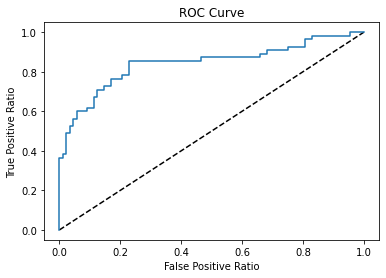

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds  = roc_curve(y3_test, test_prediction_proba)

import matplotlib.pyplot as plt
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)

plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('ROC Curve')

plt.show()

In [47]:
print('AUC value : ', roc_auc_score(y_test, test_prediction_proba))

AUC value :  0.8425619834710744


**AUC value is higher than 0.8 whic is desired.**

# 3. Precision / Recall Curve

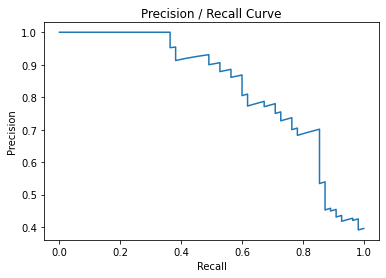

In [48]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y3_test, test_prediction_proba)

plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision / Recall Curve')

plt.show()

# 4. Logarithmic Loss

In [49]:
from sklearn.metrics import log_loss

print("Logarithmic Loss (log-loss) : " , log_loss(y3_test, test_prediction_proba))
print("Error Rate                  : " , 1- accuracy_score(y3_test, test_prediction))

Logarithmic Loss (log-loss) :  0.46496860940666
Error Rate                  :  0.2097902097902098
